In [30]:
import xarray as xr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set runing dates:
startday = [dt.datetime(2016,12,25)+dt.timedelta(days=i) for i in range(int(406))]
# print(len(startday))
folders = [dt.datetime(2016,12,25)+dt.timedelta(days=7*(i+1)) for i in range(int(58))]
folders = np.repeat(folders,7)

In [3]:
startday[66]

datetime.datetime(2017, 3, 1, 0, 0)

In [4]:
drop_vars = (
        "sbu", "tauuo", "time_counter_bounds", "time_instant_bounds", "uos", "time_instant",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1h_grid_U_2D_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [66,67]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
ogu_h = mydata['ubar']

In [5]:
ogu_h

<xarray.DataArray 'ubar' (time_counter: 48, y: 1020, x: 714)>
dask.array<concatenate, shape=(48, 1020, 714), dtype=float32, chunksize=(24, 1020, 714), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2017-03-01T01:00:00 ... 2017-...
Dimensions without coordinates: y, x
Attributes:
    long_name:           ocean barotropic current along i-axis
    units:               m/s
    online_operation:    instant
    interval_operation:  60 s
    interval_write:      1 h
    cell_methods:        time: point (interval: 60 s)

In [14]:
drop_vars = (
        "sbu", "tauuo", "time_counter_bounds", "time_instant_bounds", "uos", "time_instant", "depthu_bounds",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1d_grid_U_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [65,66]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
ogu_d = mydata['uo']

In [15]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/U_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Uart = mydata['vozocrtx']

In [8]:
ogu_d

<xarray.DataArray 'uo' (time_counter: 2, depthu: 75, y: 1020, x: 714)>
dask.array<concatenate, shape=(2, 75, 1020, 714), dtype=float32, chunksize=(1, 75, 1020, 714), chunktype=numpy.ndarray>
Coordinates:
  * depthu        (depthu) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03
    nav_lat       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2017-03-01 2017-03-02
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           Sea Water X Velocity
    units:               m/s
    online_operation:    instant
    interval_operation:  1 d
    interval_write:      1 d
    cell_methods:        time: point

In [9]:
# the day average over all depths in this location is always +ve 
ogu_d[0,:,642,274].values #depth problem is as depth=16 buuuuuuut clearly this does not go that deep here so why is it saying it does in the quant run?

array([-0.05626397, -0.05699444, -0.05729647, -0.05753922, -0.05766503,
       -0.0576653 , -0.05749097, -0.0572189 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [10]:
# it is the baroclinic velocity that fluctuates between positive and negative to give the effect of tides
ogu_h[:,642,274].values #note, no depths 

array([-0.03699363, -0.07874954, -0.0947038 , -0.07106147, -0.0585912 ,
       -0.05837668, -0.05790332, -0.04281646, -0.01704929,  0.00526118,
        0.02151871, -0.00532399, -0.05992309, -0.11249718, -0.14042586,
       -0.11737564, -0.09332921, -0.08541823, -0.08460504, -0.06928234,
       -0.04099879, -0.01316554,  0.00176679, -0.00500049, -0.04481939,
       -0.09450945, -0.134373  , -0.1319932 , -0.09641121, -0.08210477,
       -0.08357025, -0.07684471, -0.05636799, -0.03343146, -0.02104714,
       -0.02670595, -0.05045392, -0.08166492, -0.10281743, -0.09709425,
       -0.08587497, -0.08066582, -0.08711532, -0.08490438, -0.06917249,
       -0.04031951, -0.01156683,  0.00533181], dtype=float32)

In [11]:
#time when the baroclinic was negative, the new is mostly negative
new[0,642,274,:]

<xarray.DataArray 'vozocrtx' (depthu: 75)>
array([-0.092901, -0.09362 , -0.093919, -0.094157, -0.094283, -0.094286,
       -0.094117, -0.093856,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan])
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...
  * depthu        (depthu) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03

# Go through the process again to see if you get the same results!

In [12]:
mydata = xr.open_dataset("/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc")
e3t = mydata['e3t_0']
e3t

<xarray.DataArray 'e3t_0' (t: 1, z: 75, y: 1020, x: 714)>
[54621000 values with dtype=float64]
Dimensions without coordinates: t, z, y, x

In [13]:
mydata.tmask[0,:,642,274] #also doesnt go down to 16 BUT does go down further than the |u|>0 values

<xarray.DataArray 'tmask' (z: 75)>
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int8)
Dimensions without coordinates: z

In [14]:
# convert e3t to e3u and to e3v
e3t_xshift = e3t.shift(x=-1,fill_value=0)
e3u = e3t_xshift+e3t
e3u = e3u*0.5
e3u = e3u.rename({'z': 'depthu'})
e3u = e3u.squeeze()

e3t_yshift = e3t.shift(y=-1,fill_value=0)
e3v = e3t_yshift+e3t
e3v = e3v*0.5
e3v = e3v.rename({'z': 'depthv'})
e3v = e3v.squeeze()

In [15]:
# hourly is already in barotropic form so no need to do conversion
ogu_h

<xarray.DataArray 'ubar' (time_counter: 48, y: 1020, x: 714)>
dask.array<concatenate, shape=(48, 1020, 714), dtype=float32, chunksize=(24, 1020, 714), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2017-03-01T01:00:00 ... 2017-...
Dimensions without coordinates: y, x
Attributes:
    long_name:           ocean barotropic current along i-axis
    units:               m/s
    online_operation:    instant
    interval_operation:  60 s
    interval_write:      1 h
    cell_methods:        time: point (interval: 60 s)

In [16]:
# need to calculate baroclinic component of daily 
ut_d = (ogu_d*e3u).sum(dim='depthu')/e3u.sum(dim='depthu')

In [17]:
ut_d[0,642,274].values

array(-9.90026661e-05)

In [18]:
#subtract from u to get baroclinic component
uc_d = ogu_d-ut_d

In [19]:
uc_d[0,:,642,274].values #all water values still positive

array([-5.61649657e-02, -5.68954355e-02, -5.71974709e-02, -5.74402145e-02,
       -5.75660250e-02, -5.75663007e-02, -5.73919645e-02, -5.71198991e-02,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  9.90026661e-05,  9.90026661e-05,  9.90026661e-05,
        9.90026661e-05,  

In [20]:
offset = dt.timedelta(hours=1)
uc_h_interp = uc_d.resample(time_counter="1H", loffset=offset).interpolate("linear")

In [21]:
uc_h_interp[0,:,642,274].values #still positive

array([-5.59069233e-02, -5.66260572e-02, -5.69257531e-02, -5.71636982e-02,
       -5.72889391e-02, -5.72919390e-02, -5.71231431e-02, -5.68618836e-02,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  

In [22]:
u_new = ogu_h  + uc_h_interp

In [23]:
uc_h_interp.time_counter[0]

<xarray.DataArray 'time_counter' ()>
array('2017-03-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00

In [24]:
ogu_h.time_counter[0]

<xarray.DataArray 'time_counter' ()>
array('2017-03-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_counter_bounds

In [25]:
u_new.time_counter[0]

<xarray.DataArray 'time_counter' ()>
array('2017-03-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_counter_bounds

In [26]:
u_new[0,642,274,:].values

array([-0.09290055, -0.09361968, -0.09391938, -0.09415732, -0.09428257,
       -0.09428557, -0.09411677, -0.09385551, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03689509,
       -0.03689509, -0.03689509, -0.03689509, -0.03689509, -0.03

In [27]:
ogu_h[0,642,274].values

array(-0.03699363)

In [28]:
uc_h_interp[0,:,642,274].values

array([-5.59069233e-02, -5.66260572e-02, -5.69257531e-02, -5.71636982e-02,
       -5.72889391e-02, -5.72919390e-02, -5.71231431e-02, -5.68618836e-02,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  9.85364899e-05,  9.85364899e-05,  9.85364899e-05,
        9.85364899e-05,  

### cant see anything weird in U - try V

In [29]:
drop_vars = (
        "sbv", "tauvo", "time_counter_bounds", "time_instant_bounds", "vos", "time_instant",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1h_grid_V_2D_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [66,67]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_h = mydata['vbar']

In [30]:
v_h[0,642,274].values

array(-0.41076231)

In [31]:
drop_vars = (
        "sbv", "tauvo", "time_counter_bounds", "time_instant_bounds", "vos", "time_instant", "depthv_bounds",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1d_grid_V_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [65,66]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_d = mydata['vo']

In [32]:
v_d[0,:,642,274].values

array([ 0.05094801,  0.05075406,  0.04972368,  0.04902174,  0.04843394,
        0.04780529,  0.04728256,  0.04697528,  0.04698906,  0.04798222,
        0.05031079,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [33]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/V_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
new = mydata['vomecrty']

In [34]:
new[0, 642, 274,:]

<xarray.DataArray 'vomecrty' (depthv: 75)>
array([-0.359694, -0.359891, -0.360894, -0.361579, -0.362148, -0.362753,
       -0.36325 , -0.363535, -0.363524, -0.362556, -0.360278,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan])
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...
  * depthv        (depthv) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03

In [35]:
# need to calculate baroclinic component of daily 
vt_d = (v_d*e3v).sum(dim='depthv')/e3v.sum(dim='depthv')

In [36]:
vc_d = v_d-vt_d

In [37]:
offset = dt.timedelta(hours=1)
vc_h_interp = vc_d.resample(time_counter="1H", loffset=offset).interpolate("linear")

In [38]:
v_new = v_h  + vc_h_interp

In [39]:
v_new[0,642,274,:].values

array([-0.35969388, -0.35989147, -0.36089428, -0.3615787 , -0.36214786,
       -0.36275287, -0.36325043, -0.36353548, -0.36352411, -0.36255627,
       -0.36027839, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41090203,
       -0.41090203, -0.41090203, -0.41090203, -0.41090203, -0.41

# lets check salinity!

In [42]:
drop_vars = (
        "sbv", "tauvo", "time_counter_bounds", "time_instant_bounds", "vos", "time_instant", "depthv_bounds",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1d_grid_T_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [65,66]]

mydata = xr.open_mfdataset(files)#, drop_variables=drop_vars)
sal = mydata.so

In [45]:
sal[0,:,642,274].values

array([32.215397, 32.22167 , 32.2218  , 32.221935, 32.222057, 32.22218 ,
       32.2223  , 32.22241 , 32.22254 , 32.222633, 32.2227  , 32.2228  ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ], dtype=float32)

#### well well well - the mesh mask and U and V files not mathcing is not the problem that i thought it was! looks like the U and V just go to zero near the bottom

# lets make some vector plots of the artifial U and V at the time I am having trouble

In [33]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/U_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Uart = mydata['vozocrtx'][:,240:300, 600:,:]

mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/V_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Vart = mydata['vomecrty'][:,240:300, 600:,:]

<xarray.DataArray 'nav_lat' (x: 714)>
array([49.578773, 49.576847, 49.57492 , ..., 48.41022 , 48.409035, 48.407852],
      dtype=float32)
Coordinates:
    nav_lat  (x) float32 ...
    nav_lon  (x) float32 ...
Dimensions without coordinates: x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

Text(0.5, 1.0, 'Time=0, Depth=15 (16 in figrid)\nmax U = 1.326 max V = 1.616')

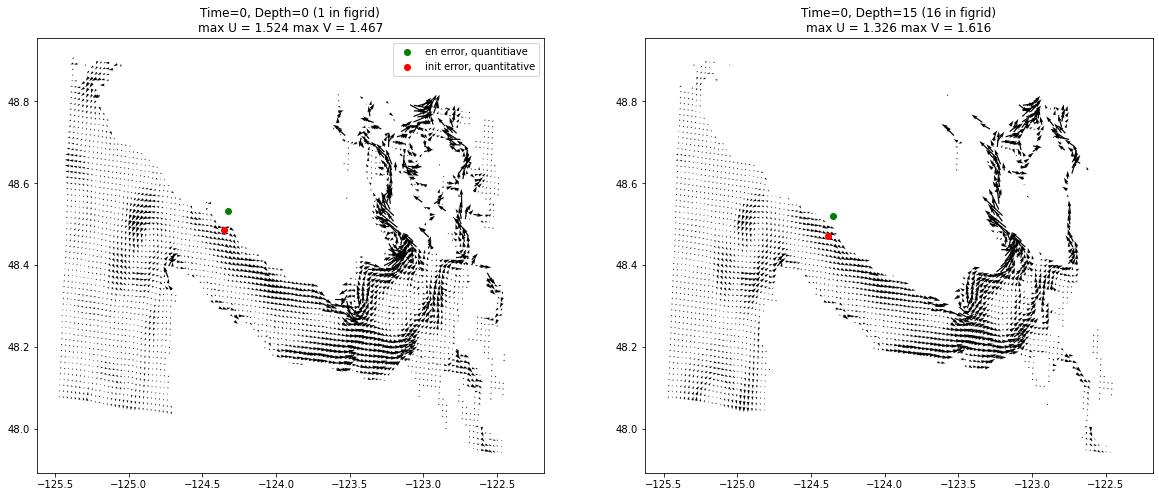

In [78]:
#time 0
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].quiver(Uart.nav_lon, Uart.nav_lat, Uart[0,:,:,0], Vart[0,:,:,0]) 
ax[0].scatter(mydata.nav_lon[273,641], mydata.nav_lat[273,614], c='g', label='en error, quantitiave')
ax[0].scatter(mydata.nav_lon[272,640], mydata.nav_lat[272,640], c='r', label='init error, quantitative')
ax[0].set_title('Time=0, Depth=0 (1 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,0].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,0].max().values,3)))
ax[0].legend()

ax[1].quiver(Uart.nav_lon, Uart.nav_lat, Uart[0,:,:,15], Vart[0,:,:,15]) 
ax[1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))

Text(0.5, 1.0, 'Time=1, Depth=15 (16 in figrid)\nmax U = 1.072 max V = 1.155')

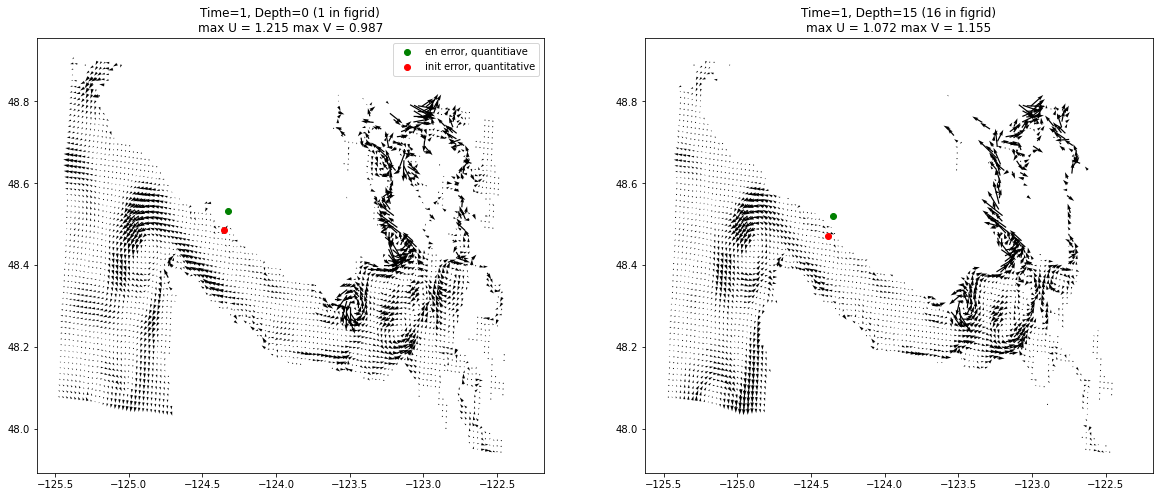

In [79]:
#time 1
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].quiver(Uart.nav_lon, Uart.nav_lat, Uart[1,:,:,0], Vart[1,:,:,0]) 
ax[0].scatter(mydata.nav_lon[273,641], mydata.nav_lat[273,614], c='g', label='en error, quantitiave')
ax[0].scatter(mydata.nav_lon[272,640], mydata.nav_lat[272,640], c='r', label='init error, quantitative')
ax[0].set_title('Time=1, Depth=0 (1 in figrid)\nmax U = '+str(np.round(Uart[1,:,:,0].max().values,3))+' max V = '+str(np.round(Vart[1,:,:,0].max().values,3)))
ax[0].legend()

ax[1].quiver(Uart.nav_lon, Uart.nav_lat, Uart[1,:,:,15], Vart[1,:,:,15]) 
ax[1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1].set_title('Time=1, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[1,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[1,:,:,15].max().values,3)))

#### idk about you but these quiver plots and max values look just sooooooooo reasonable to me
I think its a problem with how I've set up ariane - not the artificial tides files since a) these values look reasonable on the quivers and are in a resonable range in for max values and b) the numbers shown here are magnitudes off what ariane is saying is inthem in babypoo